# This notebook is used to test the model on a single row of data. It is used to check if the model is working correctly.

# Imports

In [11]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

# Model path

In [12]:
# TODO make this dynamic. It runs a model from a specific run of wandb.

model_path = "model_scripted.pt"

# Loading the model

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.jit.load(model_path, map_location=device)
model.eval()

RecursiveScriptModule(
  original_name=LSTMModel
  (lstm): RecursiveScriptModule(original_name=LSTM)
  (fc): RecursiveScriptModule(original_name=Linear)
)

# Loading the data

In [14]:
# Copied that over from testing, TODO remove it and add it to a utils file

def load_features_labels():
    df = pd.read_csv("../data/preprocessing/02_pp_sg_train_features.csv", sep=";")

    parking_data_labels = ["P24", "P44", "P42", "P33", "P23", "P25", "P21", "P31", "P53", "P32", "P22", "P52", "P51",
                           "P43"]  # TODO get these from metadata file
    ignored_columns = ["datetime", "date", "year", "month", "day", "weekdayname", "weekday", "time", "hour", "minute"]

    y = df[parking_data_labels]
    X = df.drop(columns=parking_data_labels)
    X = X.drop(columns=ignored_columns)

    input_dim = len(X.columns)
    output_dim = len(y.columns)

    print(f"Input dimension: {input_dim}, columns: {X.columns}")
    print(f"Output dimension: {output_dim}, columns: {y.columns}")

    return X, y, input_dim, output_dim


def build_dataset(batch_size, X, y):
    features = torch.Tensor(X.values)
    targets = torch.Tensor(y.values)

    dataset = TensorDataset(features, targets)

    return DataLoader(dataset, batch_size=batch_size, shuffle=False, drop_last=True)


# Plotting the prediction

For demo purposes

In [15]:
def plot_prediction(output, target):
    numpy_output = output.detach().cpu().numpy()
    numpy_target = target.detach().cpu().numpy()
    
    parking_data_labels = ["P24", "P44", "P42", "P33", "P23", "P25", "P21", "P31", "P53", "P32", "P22", "P52", "P51",
                           "P43"]  # TODO get these from metadata file
    df_output = pd.DataFrame(numpy_output, columns=parking_data_labels)
    df_target = pd.DataFrame(numpy_target, columns=parking_data_labels)

    n_features = len(df_output.columns)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Setting the positions of the bars
    ind = np.arange(n_features)  # the x locations for the groups
    width = 0.35  # the width of the bars
    
    # Plotting bars for each row
    bars1 = ax.bar(ind - width/2, df_output.iloc[0], width, label='Prediction (from model)')
    bars2 = ax.bar(ind + width/2, df_target.iloc[0], width, label='Target (form dataset)')
    
    # Adding some text for labels, title, and custom x-axis tick labels
    ax.set_xlabel('Parking garages')
    ax.set_ylabel('Free parking spots')
    ax.set_title('Comparison of Two Rows in a Bar Chart')
    ax.set_xticks(ind)
    ax.set_xticklabels(df_output.columns)
    ax.legend()
    
    plt.show()

# Testing the model

Uses the model to predict the parking data for a single row of data. The model is loaded from the path specified above.

In [16]:
def predict(index_to_predict):
    X, y, input_dim, output_dim = load_features_labels()

    batch_size = 1
    
    X_to_predict = X[index_to_predict:index_to_predict+batch_size]
    y_to_predict = y[index_to_predict:index_to_predict+batch_size]
    
    dataloader = build_dataset(batch_size, X_to_predict, y_to_predict)
    
    data, target = next(iter(dataloader))
    data, target = data.view([batch_size, -1, input_dim]).to(device), target.to(device)
    output = model(data)
    plot_prediction(output, target)

Input dimension: 18, columns: Index(['ferien', 'feiertag', 'covid_19', 'olma_offa', 'temperature_2m_max',
       'temperature_2m_min', 'rain_sum', 'snowfall_sum', 'sin_minute',
       'cos_minute', 'sin_hour', 'cos_hour', 'sin_weekday', 'cos_weekday',
       'sin_day', 'cos_day', 'sin_month', 'cos_month'],
      dtype='object')
Output dimension: 14, columns: Index(['P24', 'P44', 'P42', 'P33', 'P23', 'P25', 'P21', 'P31', 'P53', 'P32',
       'P22', 'P52', 'P51', 'P43'],
      dtype='object')


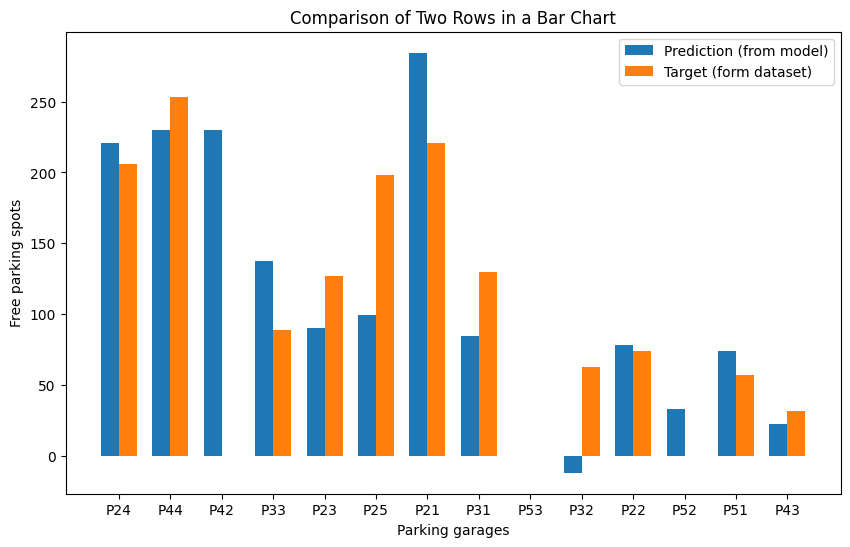

Input dimension: 18, columns: Index(['ferien', 'feiertag', 'covid_19', 'olma_offa', 'temperature_2m_max',
       'temperature_2m_min', 'rain_sum', 'snowfall_sum', 'sin_minute',
       'cos_minute', 'sin_hour', 'cos_hour', 'sin_weekday', 'cos_weekday',
       'sin_day', 'cos_day', 'sin_month', 'cos_month'],
      dtype='object')
Output dimension: 14, columns: Index(['P24', 'P44', 'P42', 'P33', 'P23', 'P25', 'P21', 'P31', 'P53', 'P32',
       'P22', 'P52', 'P51', 'P43'],
      dtype='object')


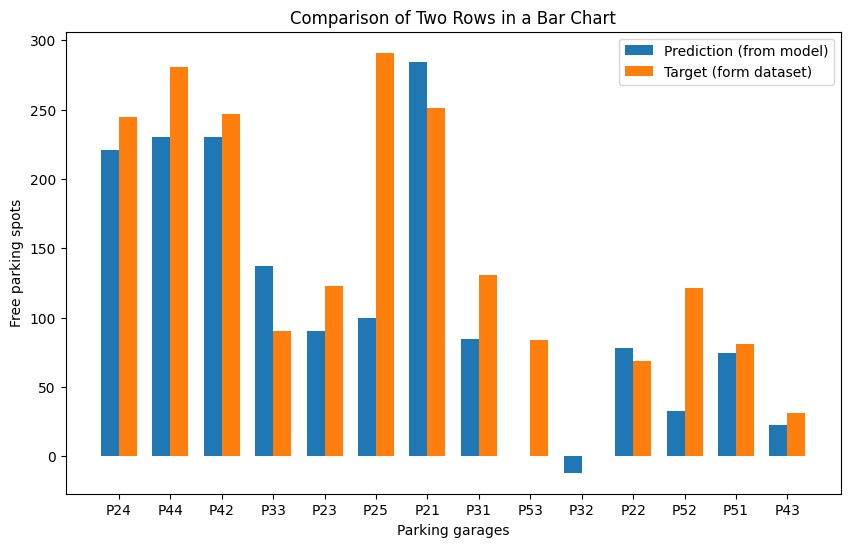

Input dimension: 18, columns: Index(['ferien', 'feiertag', 'covid_19', 'olma_offa', 'temperature_2m_max',
       'temperature_2m_min', 'rain_sum', 'snowfall_sum', 'sin_minute',
       'cos_minute', 'sin_hour', 'cos_hour', 'sin_weekday', 'cos_weekday',
       'sin_day', 'cos_day', 'sin_month', 'cos_month'],
      dtype='object')
Output dimension: 14, columns: Index(['P24', 'P44', 'P42', 'P33', 'P23', 'P25', 'P21', 'P31', 'P53', 'P32',
       'P22', 'P52', 'P51', 'P43'],
      dtype='object')


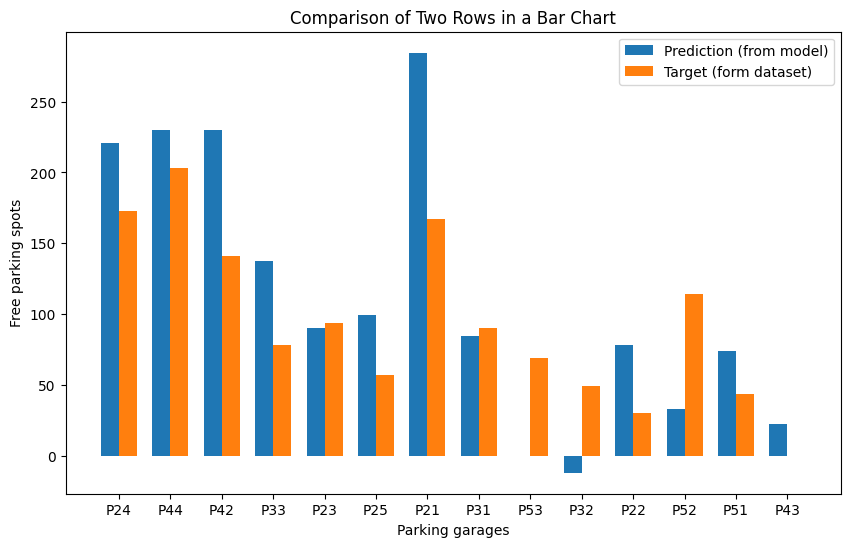

Input dimension: 18, columns: Index(['ferien', 'feiertag', 'covid_19', 'olma_offa', 'temperature_2m_max',
       'temperature_2m_min', 'rain_sum', 'snowfall_sum', 'sin_minute',
       'cos_minute', 'sin_hour', 'cos_hour', 'sin_weekday', 'cos_weekday',
       'sin_day', 'cos_day', 'sin_month', 'cos_month'],
      dtype='object')
Output dimension: 14, columns: Index(['P24', 'P44', 'P42', 'P33', 'P23', 'P25', 'P21', 'P31', 'P53', 'P32',
       'P22', 'P52', 'P51', 'P43'],
      dtype='object')


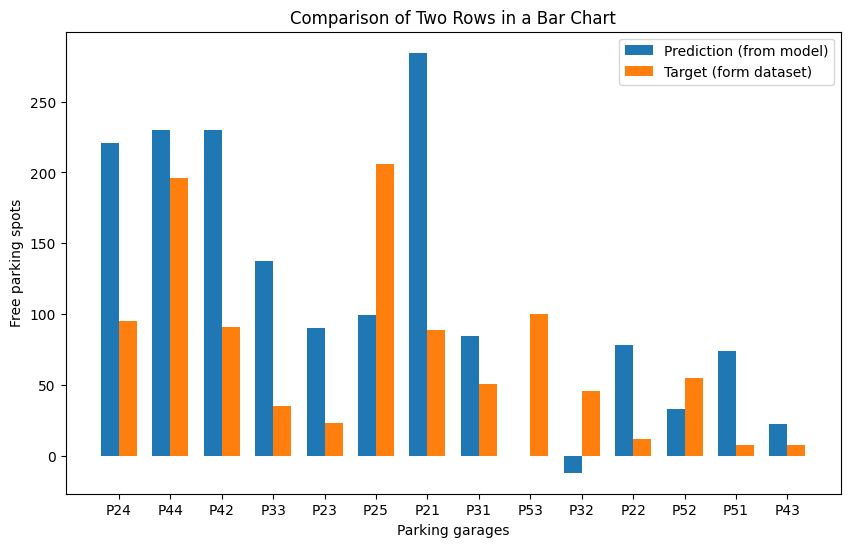

Input dimension: 18, columns: Index(['ferien', 'feiertag', 'covid_19', 'olma_offa', 'temperature_2m_max',
       'temperature_2m_min', 'rain_sum', 'snowfall_sum', 'sin_minute',
       'cos_minute', 'sin_hour', 'cos_hour', 'sin_weekday', 'cos_weekday',
       'sin_day', 'cos_day', 'sin_month', 'cos_month'],
      dtype='object')
Output dimension: 14, columns: Index(['P24', 'P44', 'P42', 'P33', 'P23', 'P25', 'P21', 'P31', 'P53', 'P32',
       'P22', 'P52', 'P51', 'P43'],
      dtype='object')


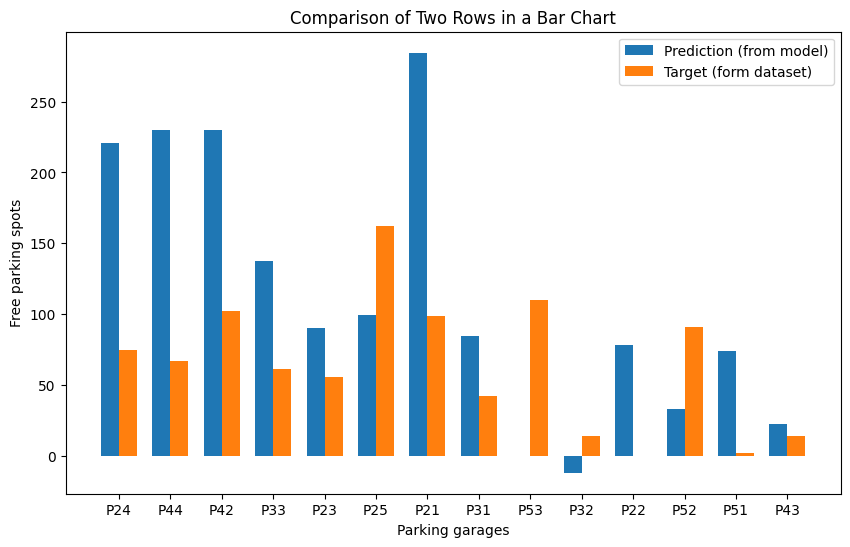

In [20]:
predict(0)
predict(10000)
predict(15000)
predict(20000)
predict(44444)